## 카테고리 확률변수

베르누이 확률변수는 동전을 예시로 앞면 혹은 뒷면이 발생할 사건을 0과 1로 표현했다.

즉, 이진 분류 문제에 사용할 수 있는 확률변수이다.

그런데 주사위와 같은 다중분류문제는 베르누이 확률변수만으로는 해결할 수 없다.

따라서 이러한 경우에 사용하는 것이 카테고리 확률변수이다.

**카테고리 확률변수**는 1부터 $K$까지의 $K$개의 정숫값 중 하나를 갖는다.

이 값을 `범줏값, 카테고리, 클래스`라고 한다.

주사위의 경우 $K=6$인 카테고리 분포가 된다.

주사위를 던지는 경우 카테고리는 스칼라값이 된다.

In [2]:
df = pd.DataFrame({
    '주사위 눈':[1, 2, 3, 4, 5, 6]
})
df

,주사위 눈
0,1
1,2
2,3
3,4
4,5
5,6


하지만 카테고리 확률변수는 0과 1만으로 이루어진 다차원 벡터를 출력한다.

위의 각 주사위 눈이 나오는 경우를 아래와 같이 0과 1로 이루어진 다차원 벡터로 표현한 것이 **원핫인코딩**이라 한다.

In [6]:
ohc = pd.get_dummies(df['주사위 눈'])
ohc

,1,2,3,4,5,6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


따라서 확률변수의 값을 벡터로 표시한다.

$x = (x_1, x_2, x_3, x_4, x_5, x_6)$

이 벡터를 구성하는 원소 $x_i$에는 다음의 조건이 붙는다.

\begin{split}
\begin{align}
x_i = \begin{cases} 0 \\ 1 \end{cases}
\end{align}
\end{split}

벡터를 구성하는 $x_i$는 0과 1만을 값으로 가진다.

$$\sum_{k=1}^K x_k = 1$$

벡터로 표현된 $x_i$중 하나만이 그 1을 값으로 갖는다.

이 경우 SUM을 SUM으로 보는 것이 아닌 COUNTING으로 보는 관점이 올바르다.

이렇게 원핫인코딩으로 카테고리 분포 값을 표시하게 되면 각 $x_i$ 하나하나가 각각의 베르누이 확률변수라 할 수 있다.

따라서 각각 1이 나올 확률을 나타내는 모수 $\mu_k$또한 $K$개를 가지며 벡터로 표현한다.

$$\mu = (\mu_1, ..., \mu_k)$$

모수는 다음의 조건을 따른다.

\begin{align}
0 \leq \mu_i \leq 1
\end{align}

여기서 모수는 각각의 $x$가 1일 확률을 표현하므로 0과 1사이의 값을 갖는다.

\begin{align}
\sum_{k=1}^K \mu_k = 1
\end{align}

각각의 $x$는 서로 배터적이면서 완전하기에 전체확률의 법칙에 따라 그 합은 1이된다.

여기서의 SUM은 SUM으로 보는 관점이 올바르다.

## 카테고리 확률분포

카테고리 확률변수의 확률분포인 카테고리 확률분포는 다음과 같이 표현한다.

\begin{align}
\text{Cat}(x_1, x_2, \dots, x_K;\mu_1, \dots, \mu_K)
\end{align}

여기서 $x_k, \mu_k$를 벡터로 보면 다음처럼 간단하게 표기할 수 있다.

\begin{align}
\text{Cat}(x;\mu)
\end{align}

카테고리 확률분포의 확률질량함수는 다음과 같이 표현한다.

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}

이를 간단히 표시하면

\begin{align}
\text{Cat}(x;\mu) = \mu_1^{x_1} \mu_2^{x_2}  \cdots \mu_K^{x_K}  =  \prod_{k=1}^K \mu_k^{x_k}
\end{align}

가 된다. 이것이 원핫인코딩의 장점 중 하나이다.

## 카테고리분포의 모멘트

카테고리분포는 표본값이 벡터이기에 기댓값, 분산도 벡터이다.

\begin{align}
\text{E}[x_k] = \mu_k
\end{align}

\begin{align}
\text{Var}[x_k] = \mu_k(1-\mu_k)
\end{align}

## 카테고리분포 시뮬레이션

카테고리분포 시뮬레이션을 위해선 다항분포 클래스에서 시행횟수를 1로 설정한다.

In [7]:
import scipy as sp
import scipy.stats

In [16]:
# 모수가 벡터로 입력

mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(1, mu)

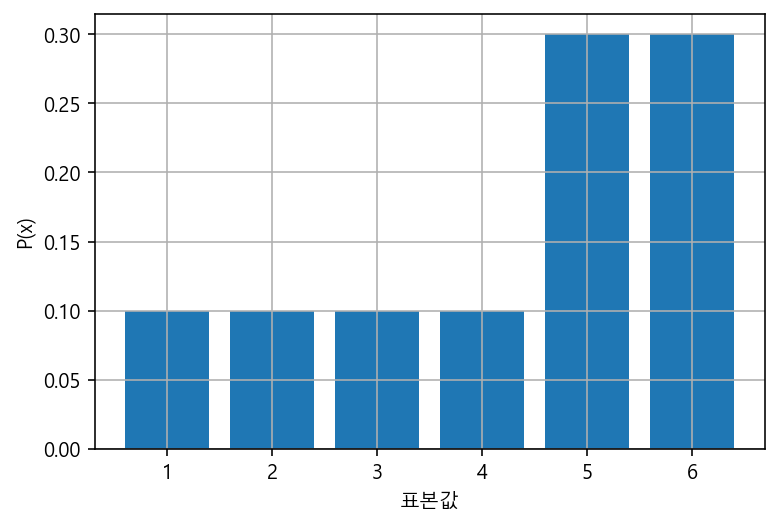

In [19]:
xx = np.arange(1, 7)

# 카테고리분포 출력값은 벡터
# 인수로 원핫인코딩 벡터 지정
xx_ohe = pd.get_dummies(xx)

plt.bar(xx, rv.pmf(xx_ohe.values))
plt.grid()
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.show()

`rvs`결과 또한 원핫인코딩 벡터

In [21]:
x = rv.rvs(100)
x[:5]

array([[0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

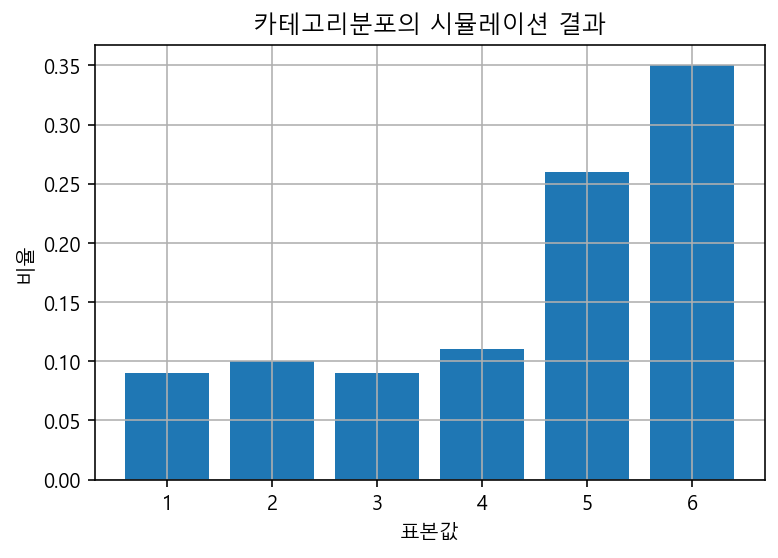

In [24]:
y = x.sum(axis=0) / float(len(x))
plt.bar(np.arange(1, 7), y)
plt.title("카테고리분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.ylabel("비율")
plt.grid()
plt.show()

## 다중분류문제

IRIS 데이터의 품종은 3가지로 $K$ = 3인 카테고리분포를 이룬다고 할 수 있다.

꽃잎 폭이라는 특징에 따라 카테고리분포의 모양이 달라지는 것을 확인할 수 있다.

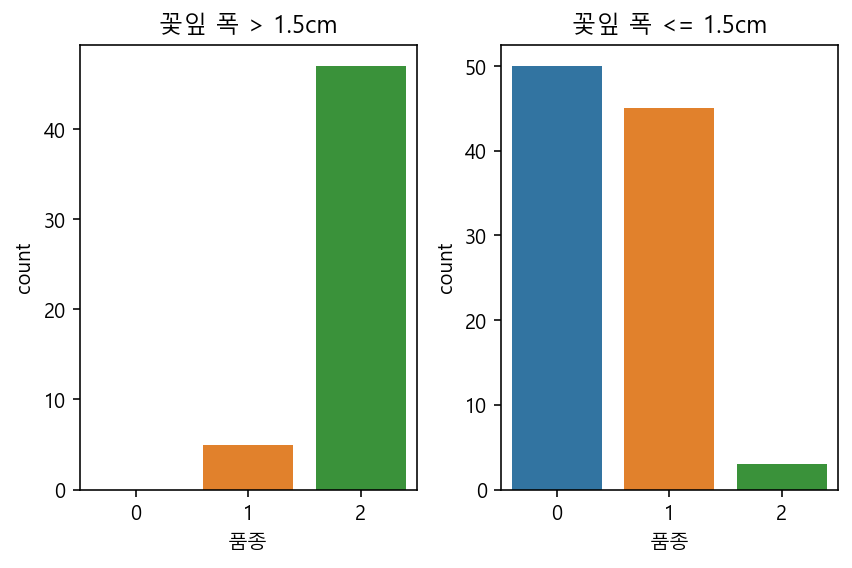

In [25]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["품종"] = pd.Series(iris.target, dtype="category")

df1 = df[df["petal width (cm)"] > 1.5]
df2 = df[df["petal width (cm)"] <= 1.5]

fig, ax = plt.subplots(1, 2)
sns.countplot(x="품종", data=df1, ax=ax[0]).set_title("꽃잎 폭 > 1.5cm")
sns.countplot(x="품종", data=df2, ax=ax[1]).set_title("꽃잎 폭 <= 1.5cm")
plt.tight_layout()
plt.show()

## 다항분포

베르누이 확률변수 데이터가 복수라면 이항분포

카테고리 확률변수 데이터가 복수이면 다항분포 라 한다.

예를 들어 주사위를 $N$번 던져 각 면이 나오는 횟수의 집합을 다항분포라 할 수 있다.

예를 들어 $x = (1, 2, 1, 2, 3, 1)$은 1이 1번, 2가 2번, 3이 1번, 4가 2번, 5가 3번, 6이 1번 나왔다는 의미가 된다.

다항분포의 확률질량함수는 다음과 같이 표기한다.

\begin{align}
\text{Mu}(x;N,\mu) = \binom N x  \prod_{k=1}^K \mu_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \mu_k^{x_k}
\end{align}

## 다항분포의 모멘트

\begin{align}
\text{E}[x_k] = N\mu_k
\end{align}

\begin{align}
\text{Var}[x_k] = N\mu_k(1-\mu_k)
\end{align}

## 다항분포 시뮬레이션

In [26]:
N = 30
mu = [0.1, 0.1, 0.1, 0.1, 0.3, 0.3]
rv = sp.stats.multinomial(N, mu)

X = rv.rvs(100)
X[:10]

array([[ 3,  2,  2,  2, 14,  7],
       [ 3,  3,  3,  2,  7, 12],
       [ 1,  5,  3,  4,  6, 11],
       [ 2,  6,  5,  3,  6,  8],
       [ 3,  1,  2,  3, 13,  8],
       [ 2,  6,  1,  6,  7,  8],
       [ 6,  2,  2,  3, 11,  6],
       [ 1,  5,  4,  0, 12,  8],
       [ 0,  5,  8,  3,  8,  6],
       [ 3,  1,  4,  4,  7, 11]])

In [38]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5
0,3,2,2,2,14,7
1,3,3,3,2,7,12
2,1,5,3,4,6,11
3,2,6,5,3,6,8
4,3,1,2,3,13,8


In [35]:
df = df.stack().reset_index()
df.columns = ["시도", "클래스", "표본값"]
df.head()

,시도,클래스,표본값
0,0,0,3
1,0,1,2
2,0,2,2
3,0,3,2
4,0,4,14


스웜플롯, 바이올린 플롯을 이용해 각 카테고리에 해당하는 실숫값 데이터 집합을 하나하나 점으로 표현하고 바이올린 플롯으로 데이터의 분포를 커널밀도라는 부드러운 곡선으로 표현할 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.0% of the points

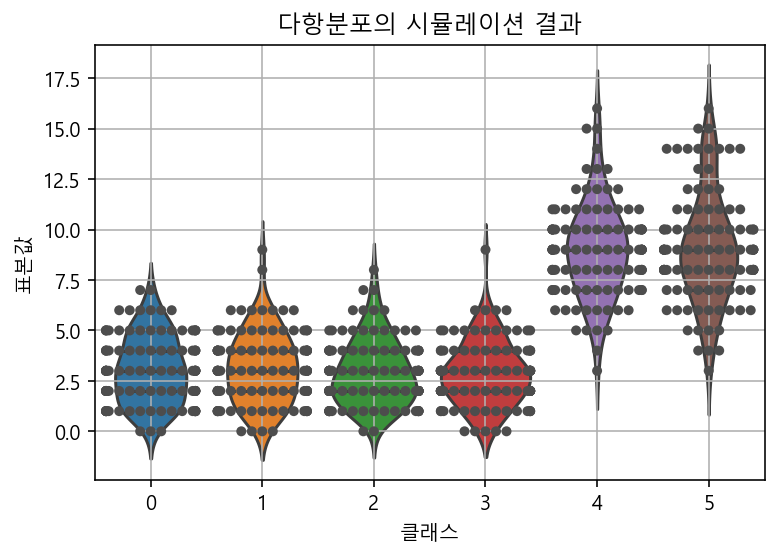

In [37]:
sns.violinplot(x="클래스", y="표본값", data=df, inner="quartile")
sns.swarmplot(x="클래스", y="표본값", data=df, color=".3")
plt.title("다항분포의 시뮬레이션 결과")
plt.grid()
plt.show()

혹은 박스플롯을 이용하여 표현하는 것 또한 가능하다.

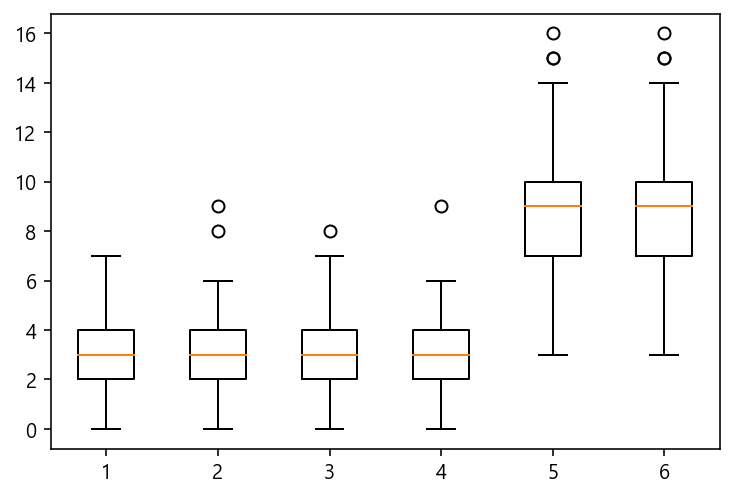

In [67]:
plt.boxplot(X)
plt.show()